### SVD Estimation
For this example a square matrix of size 2 operates on a dense set of unit vectors distributed uniformly around a unit circle. The resulting set of vectors is searched for maximum and minimum lengths to find an estimate of the singular values of the matrix.

####Note
This example is also available in ~/jvsip/python/python_examples/LinearAlgebraSimple as SVD_exploration.py to be run as a regular script. I decided to also make a notebook to support better documentation.

In [1]:
#! python
# Estimate two-norm (sigma0) and singular values (sigma0, sigma1) 
# of a two by two matrix by searching through a dense space of vectors.
# Check by reproducing estimate for A matrix using Aest=U Sigma V^t
# Motivating text Numerical Linear Algebra, Trefethen and Bau

####Goals
This example has three goals   
1) Explore the SVD   
2) Explore simple pyJvsip coding  
3) Learn a little about matplotlib   

We need the pyJvsip package and the matplotlib package. We also need pi and a function to do arccos; here we get them from numpy.

In [2]:
import pyJvsip as pv
from numpy import pi,arccos
%matplotlib inline
from matplotlib.pyplot import *

#### Input unit vectors
$ X = \begin{bmatrix} \vec{x_0} \\\\ \vec{x_1}\end{bmatrix}$   
where $\vec{x_0} $ and $\vec{x_1}$ are row vectors such that elements $ X[0,i]^2 +X[1,i]^2 = 1 $

In [3]:
N=1000 #number of points to search through for estimates
# create a vector 'arg' of evenly spaced angles between [zero, 2 pi)
arg=pv.create('vview_d',N).ramp(0.0,2.0 * pi/float(N))
# Create a matrix 'X' of unit vectors representing Unit Ball in R2
X=pv.create('mview_d',2,N,'ROW').fill(0.0)
x0=X.rowview(0);x1=X.rowview(1)
_=pv.sin(arg,x0);_=pv.cos(arg,x1)

#### Input matrix operator
$A = \begin{bmatrix} 1.0 & 1.0 \\\\ 0.0 & 2.0 \end{bmatrix}$

In [4]:
# create matrix 'A' to examine
A=pv.create('mview_d',2,2).fill(0.0)
A[0,0]=1.0;A[0,1]=2.0; A[1,1]=2.0;A[1,0]=0.0

#### Operation
$ Y = A X $

In [5]:
# create matrix Y=AX
Y=A.prod(X)
y0=Y.rowview(0);y1=Y.rowview(1)
# create vector 'n' of 2-norms for Y col vectors (sqrt(y0_i^2+y1_i^2))
n=(y0.copy.sq+y1.copy.sq).sqrt 

#### Estimate singular values
Singular values for matrix $A$ require an orthonormal basis associated with matrix $V$ and an orthonormal basis associatead with matrix $U$ such that $A V = U {\;}\Sigma $ where $\Sigma$ is a diagonal matrix with the singular values on the diagonal ordered so that they are in decreasing order.

In [6]:
# Find index of (first) maximum value and (first) minimum value
i=n.maxvalindx; j=n.minvalindx
sigma0=n[i];sigma1=n[j]
# create estimates for V, U, Sigma (S)
V=A.empty.fill(0)
U=V.copy
S=V.copy
S[0,0]=sigma0;S[1,1]=sigma1
U[0:2,0]=Y[0:2,i];U[0:2,1]=Y[0:2,j]
U[0:2,0] /=sigma0;U[0:2,1]/=sigma1 #normalize u1,u2
V[0:2,0]=X[0:2,i];V[0:2,1]=X[0:2,j] #v0, v1 already normalized
#estimate A from results of U,V,S
Aest=U.prod(S).prod(V.transview)

#### Play with matplotlib

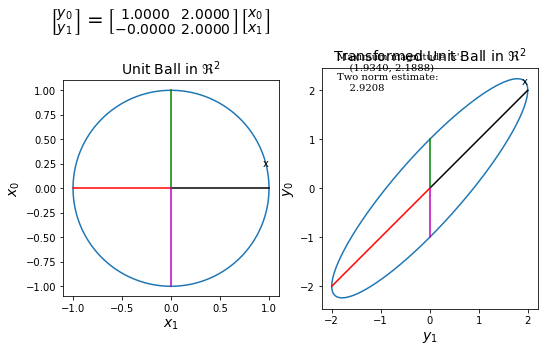

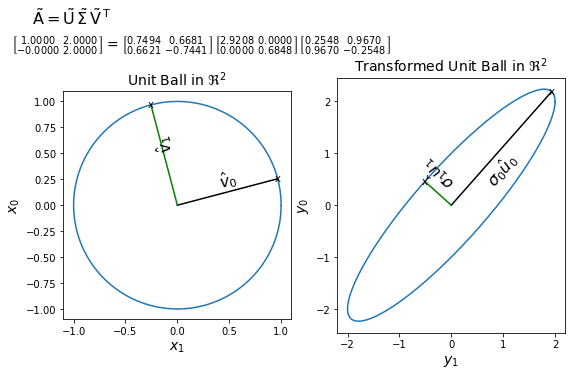

In [7]:
#PLOT Results
stk='\\stackrel' #for creating small matrices
spc='\\/'        #for creating some space
lft='\\left['    #left bracket
rgt='\\right]'   #right bracket
#Plot results for two norm
tne = "Maximum magnitude 'x':\n    "+'(%.4f, %.4f)'%(y1[i], y0[i])
tne +='\nTwo norm estimate: \n    ' + "%.4f"%sigma0
figure(1,figsize=(8.5,6))
subplot(1,2,1).set_aspect('equal')
title(r'Unit Ball in $\Re^2$',fontsize=14)
ylabel(r'$x_0$',fontsize=14)
xlabel(r'$x_1$',fontsize=14)
plot(x1.list,x0.list)
a00='{'+'%.4f'%Aest[0,0]+'}';a01='{'+'%.4f'%Aest[0,1]+'}'
a10='{'+'%.4f'%Aest[1,0]+'}';a11='{'+'%.4f'%Aest[1,1]+'}'
eqn="r\'$"+lft+stk+"{y_0}{y_1}"+rgt+"="+lft+stk+a00+a10+\
                                     spc+stk+a01+a11+rgt
eqn+= lft+stk+"{x_0}{x_1}"+rgt+"$\'"
text(-1.25,1.65,eval(eqn),fontsize=20)
text(x1[i],x0[i],'x',horizontalalignment='center',\
                     verticalalignment='center')
plot([0,x1[0]],[0,x0[0]],'k')
plot([0,x1[N/4]],[0,x0[N/4]],'g')
plot([0,x1[N/2]],[0,x0[N/2]],'r')
plot([0,x1[3*N/4]],[0,x0[3*N/4]],'m')
subplot(1,2,2).set_aspect('equal')
title(r'Transformed Unit Ball in $\Re^2$',fontsize=14)
ylabel(r'$y_0$',fontsize=14)
xlabel(r'$y_1$',fontsize=14)
plot(y1.list,y0.list)
text(y1[i],y0[i],'x',horizontalalignment='center',\
                     verticalalignment='center')
text(-1.9,2.0,tne,fontname='serif',fontsize=10)
plot([0,y1[0]],[0,y0[0]],'k')
plot([0,y1[N/4]],[0,y0[N/4]],'g')
plot([0,y1[N/2]],[0,y0[N/2]],'r')
plot([0,y1[3*N/4]],[0,y0[3*N/4]],'m')
#Plot results for singular values
a00='{'+'%.4f'%Aest[0,0]+'}';a01='{'+'%.4f'%Aest[0,1]+'}'
a10='{'+'%.4f'%Aest[1,0]+'}';a11='{'+'%.4f'%Aest[1,1]+'}'
s00='{'+'%.4f'%S[0,0]+'}';s01='{'+'%.4f'%S[0,1]+'}'
s10='{'+'%.4f'%S[1,0]+'}';s11='{'+'%.4f'%S[1,1]+'}'
u00='{'+'%.4f'%U[0,0]+'}';u01='{'+'%.4f'%U[0,1]+'}'
u10='{'+'%.4f'%U[1,0]+'}';u11='{'+'%.4f'%U[1,1]+'}'
v00='{'+'%.4f'%V[0,0]+'}';v01='{'+'%.4f'%V[0,1]+'}'
v10='{'+'%.4f'%V[1,0]+'}';v11='{'+'%.4f'%V[1,1]+'}'
estEqn="r\'$\\left[" +stk+a00+a10+spc+stk+a01+a11+"\\right] = "
estEqn+="\\left["    +stk+u00+u10+spc+stk+u01+u11+"\\right] "
estEqn+="\\left["    +stk+s00+s10+spc+stk+s01+s11+"\\right] "
estEqn+="\\left["    +stk+v00+v01+spc+stk+v10+v11+"\\right]$\'"
figure(2,figsize=(9,6.5))
subplot(1,2,1).set_aspect('equal')
title(r'Unit Ball in $\Re^2$',fontsize=14)
text(-1.6,1.50,eval(estEqn),fontsize=14)
#Use a tilde to indicate these are estimates
eqnUSV=r'$\mathrm{\tilde{A} = \tilde{U}\/\tilde{\Sigma}\/\tilde{V}^{\/T}}$'
text(-1.4,1.75,eqnUSV,fontsize=16)
#text(.5,V[0,0],r'$ \hat v_0$',rotation=25,fontsize=16)
theta=180.0/pi * arg[i]
text(V[1,0]*0.5,V[0,0]*0.5,r'$\hat v_0$',rotation=theta, fontsize=16,\
horizontalalignment='center',verticalalignment='bottom')
#text(-.1,.5,r'$ \hat v_1$',rotation = -65,fontsize=16)
theta=180.0/pi * arg[j]
text(V[1,1]*0.5,V[0,1]*0.5,r'$\hat v_1$',rotation=theta, fontsize=16, \
horizontalalignment='center',verticalalignment='bottom')
ylabel(r'$x_0$',fontsize=14)
xlabel(r'$x_1$',fontsize=14)
plot(x1.list,x0.list)
text(x1[i],x0[i],'x',horizontalalignment='center',\
                     verticalalignment='center')
text(x1[j],x0[j],'x',horizontalalignment='center',\
                     verticalalignment='center')
plot([0,x1[i]],[0,x0[i]],'k')
plot([0,x1[j]],[0,x0[j]],'g')
subplot(1,2,2).set_aspect('equal')
title(r'Transformed Unit Ball in $\Re^2$',fontsize=14)
ylabel(r'$y_0$',fontsize=14)
xlabel(r'$y_1$',fontsize=14)
plot(y1.list,y0.list)
text(y1[i],y0[i],'x',horizontalalignment='center',\
                     verticalalignment='center')
text(y1[j],y0[j],'x',horizontalalignment='center',\
                     verticalalignment='center')
cos0=y1[i]/sigma0;sin0=y0[i]/sigma0;cos1=y1[j]/sigma1;sin1=y0[j]/sigma1
theta=arccos(cos0)*180.0/pi
text(y1[i]/2,y0[i]/2,r'$ \sigma_0 \hat u_0$',rotation=theta,fontsize=16,\
                    horizontalalignment='center',verticalalignment='top')
theta=arccos(cos1)*180.0/pi
text(y1[j]/2,y0[j]/2,r'$ \sigma_1 \hat u_1$',rotation=theta,fontsize=16,\
                 horizontalalignment='center',verticalalignment='bottom')
plot([0,y1[i]],[0,y0[i]],'k')
plot([0,y1[j]],[0,y0[j]],'g')